In [1]:
# ライブラリのインポート

from itertools import product
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

print("libraries imported")

libraries imported


In [2]:
# データを読み込む

iris = datasets.load_iris()

# データを見てみる
#print(iris)
print("Data")
print(iris.data.__class__)
print(iris.data)
print("Classes ", iris.target_names)
print(iris.target.__class__)
print(iris.target)

Data
<class 'numpy.ndarray'>
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.4  3.7  1.5  0.2]
 [ 4.8  3.4  1.6  0.2]
 [ 4.8  3.   1.4  0.1]
 [ 4.3  3.   1.1  0.1]
 [ 5.8  4.   1.2  0.2]
 [ 5.7  4.4  1.5  0.4]
 [ 5.4  3.9  1.3  0.4]
 [ 5.1  3.5  1.4  0.3]
 [ 5.7  3.8  1.7  0.3]
 [ 5.1  3.8  1.5  0.3]
 [ 5.4  3.4  1.7  0.2]
 [ 5.1  3.7  1.5  0.4]
 [ 4.6  3.6  1.   0.2]
 [ 5.1  3.3  1.7  0.5]
 [ 4.8  3.4  1.9  0.2]
 [ 5.   3.   1.6  0.2]
 [ 5.   3.4  1.6  0.4]
 [ 5.2  3.5  1.5  0.2]
 [ 5.2  3.4  1.4  0.2]
 [ 4.7  3.2  1.6  0.2]
 [ 4.8  3.1  1.6  0.2]
 [ 5.4  3.4  1.5  0.4]
 [ 5.2  4.1  1.5  0.1]
 [ 5.5  4.2  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.   3.2  1.2  0.2]
 [ 5.5  3.5  1.3  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 4.4  3.   1.3  0.2]
 [ 5.1  3.4  1.5  0.2]
 [ 5.   3.5  1.3  0.3]
 [ 4.5  2.3  1.3  0.3]
 [ 4.

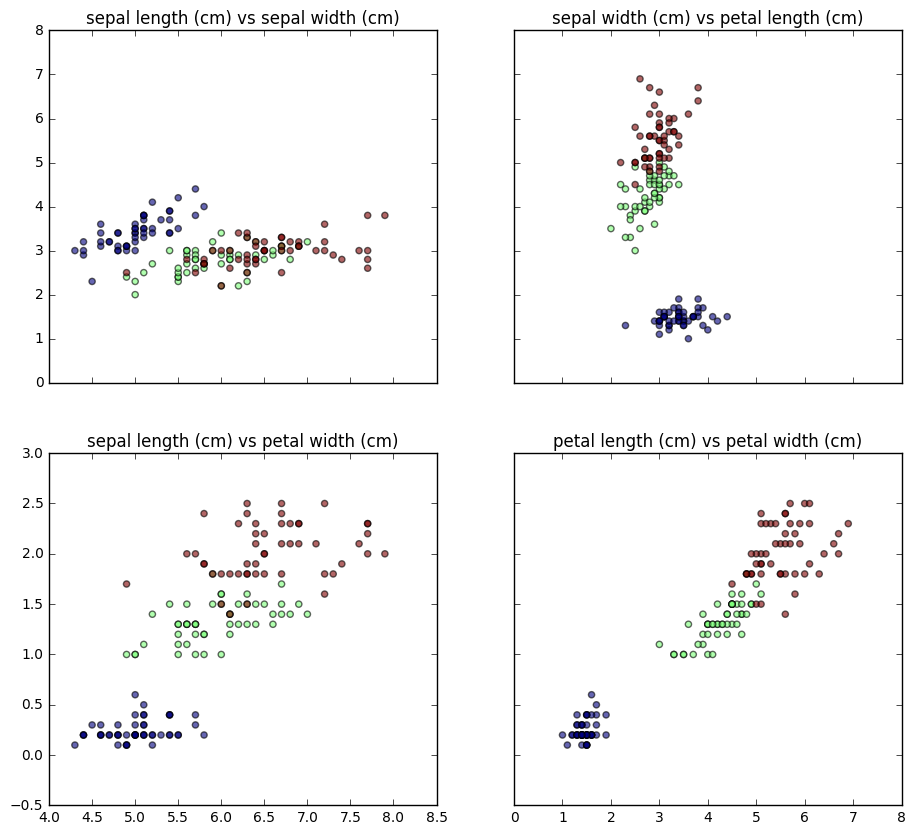

(150,)
(150,)


In [3]:
# データをプロットしてみる

plt.clf()
f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(11, 10))

axarr[0, 0].scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target, alpha=0.6)
axarr[0, 0].set_title(iris.feature_names[0] + " vs " + iris.feature_names[1])

axarr[0, 1].scatter(iris.data[:, 1], iris.data[:, 2], c=iris.target, alpha=0.6)
axarr[0, 1].set_title(iris.feature_names[1] + " vs " + iris.feature_names[2])

axarr[1, 0].scatter(iris.data[:, 0], iris.data[:, 3], c=iris.target, alpha=0.6)
axarr[1, 0].set_title(iris.feature_names[0] + " vs " + iris.feature_names[3])

axarr[1, 1].scatter(iris.data[:, 2], iris.data[:, 3], c=iris.target, alpha=0.6)
axarr[1, 1].set_title(iris.feature_names[2] + " vs " + iris.feature_names[3])

plt.show()

print(iris.data[:, 0].shape)
print(iris.data[:, 1].shape)

In [4]:
# 単純化のために2次元で扱う
X = iris.data[:, [0, 3]]
y = iris.target

#　識別器のインスタンスをつくる
svm = SVC(kernel='rbf', probability=True)

# 学習させる
svm.fit(X, y)

# 予測する
print(svm.predict([X[0]]))
print(svm.predict([X[100]]))
print(svm.predict([[4.5, 1.1]]))

[0]
[2]
[1]


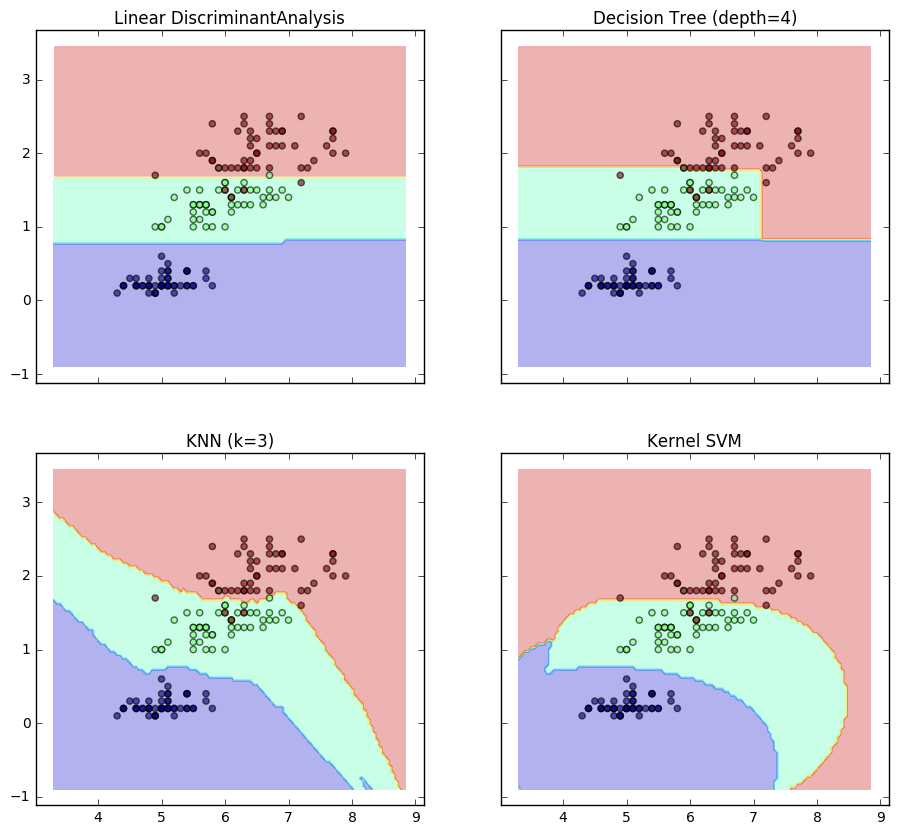

In [5]:
# 他の識別器も同じ使い方
classifiers = [
    LinearDiscriminantAnalysis(solver="svd", store_covariance=True),
    DecisionTreeClassifier(max_depth=4),
    KNeighborsClassifier(n_neighbors=3),
    SVC(kernel='rbf', probability=True),
    ]

for classifier in classifiers:
    classifier.fit(X, y)

# Plotting decision regions
plt.clf()
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(11, 10))

for index, classifier, title in zip([0, 1, 2, 3], classifiers, ['Linear DiscriminantAnalysis', 'Decision Tree (depth=4)', 'KNN (k=3)', 'Kernel SVM', 'Liner SVM']):
    predicted = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    predicted = predicted.reshape(xx.shape)
    
    #     print(predicted)
    axarr[index // 2, index % 2].contourf(xx, yy, predicted, alpha=0.3)
    axarr[index // 2, index % 2].scatter(X[:, 0], X[:, 1], c=y, alpha=0.6)
    axarr[index // 2, index % 2].set_title(title)
    
plt.show()

In [6]:
# clf.score

svm = SVC(kernel='rbf', probability=True)
svm.fit(X, y)

print("Score for training set = ", svm.score(X, y))

Score for training set =  0.966666666667


In [7]:
# テスト精度を計算してみる

def train_and_test_score(clf, x, y, test_rate=0.15):
    length = y.shape[0]
    test_size = int(length * test_rate)
    random_indices = np.random.permutation(length)

    test_indices = random_indices[0:test_size]
    training_indices = random_indices[test_size:]

    clf.fit(x[training_indices], y[training_indices])
    training_score = clf.score(x[training_indices], y[training_indices])

    test_score = clf.score(x[test_indices], y[test_indices])
    return training_score, test_score

for clf in classifiers:
    training_score, test_score = train_and_test_score(clf, X, y)
    
    print(clf.__class__)
    print("Training score = ", training_score)
    print("Test Score = ", test_score)

<class 'sklearn.discriminant_analysis.LinearDiscriminantAnalysis'>
Training score =  1.0
Test Score =  0.9453125
<class 'sklearn.tree.tree.DecisionTreeClassifier'>
Training score =  1.0
Test Score =  0.953125
<class 'sklearn.neighbors.classification.KNeighborsClassifier'>
Training score =  0.909090909091
Test Score =  0.859375
<class 'sklearn.svm.classes.SVC'>
Training score =  0.954545454545
Test Score =  0.9609375
